## Decompositions

1. PLU: Linear solve
2. QR: Least squares and linear solve (more reliable but slower than PLU)
3. Cholesky: Positive definite (faster)
4. SVD: low rank approximation, nullspace

In [11]:
using LinearAlgebra

n = 5
A = randn(n, n)
L,U,p = lu(A)
b = randn(n)

U\(L\b[p]) == A\b


P = I(n)[p,:]
U\(L\(P*b)) == A\b

true

In [12]:
Q,R = qr(A)
Q'*(R\b)

5-element Vector{Float64}:
 -0.7657590987343752
  2.1647569167635448
  0.3426482276220504
  0.01477428071981235
  1.539665430649797

In [25]:
S = Symmetric(A)+10I
L = cholesky(S).L

norm(S\b - L'\(L\b))

2.881939084222627e-17

In [30]:
A = randn(5,3)

U,σ,V = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.0261663  -0.414219  -0.378094
 -0.37507     0.223065   0.54987
  0.391488   -0.325706  -0.282456
 -0.836202   -0.164273  -0.41837
 -0.0783717  -0.803489   0.547606
singular values:
3-element Vector{Float64}:
 3.221720141918618
 1.9913794369441546
 0.9147029340476346
Vt factor:
3×3 Matrix{Float64}:
 -0.425046     0.754476  -0.500102
 -0.905164    -0.356536   0.23143
  0.00369592  -0.551043  -0.834469

In [73]:
using Images, TestImages, Plots

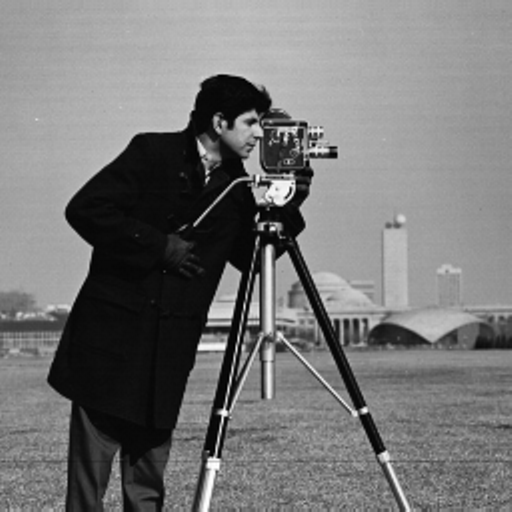

In [50]:
img = testimage("cameraman")

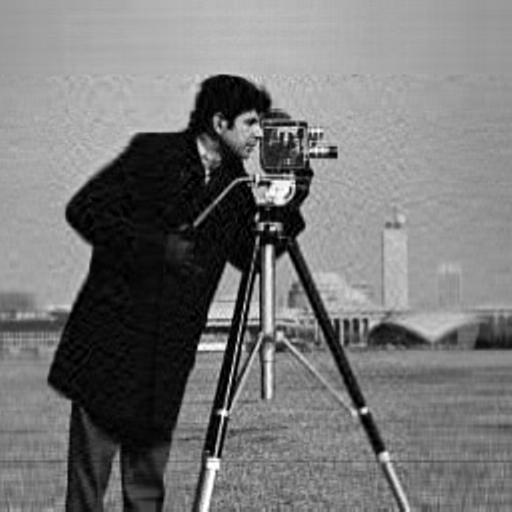

In [77]:
U,σ,V = svd(img)

r = 50
Gray.(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]')

In [79]:
512^2

262144

In [80]:
2 * 512 * r

51200

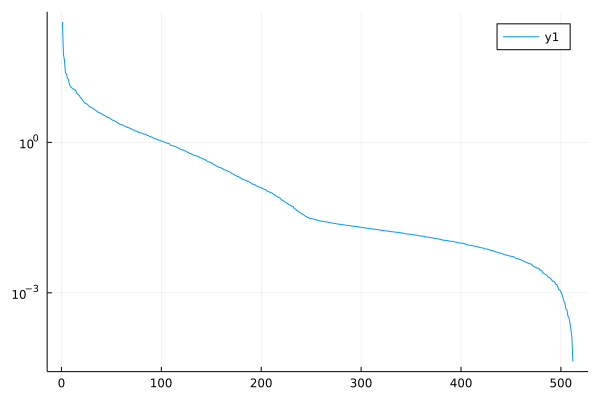

In [75]:
plot(σ;yscale=:log10)

## Condition Numbers

In [86]:
m,n = 10,15

k = 1:m
j = 1:n
H = inv.(k .+ j')

10×15 Matrix{Float64}:
 0.5        0.333333   0.25       …  0.0714286  0.0666667  0.0625
 0.333333   0.25       0.2           0.0666667  0.0625     0.0588235
 0.25       0.2        0.166667      0.0625     0.0588235  0.0555556
 0.2        0.166667   0.142857      0.0588235  0.0555556  0.0526316
 0.166667   0.142857   0.125         0.0555556  0.0526316  0.05
 0.142857   0.125      0.111111   …  0.0526316  0.05       0.047619
 0.125      0.111111   0.1           0.05       0.047619   0.0454545
 0.111111   0.1        0.0909091     0.047619   0.0454545  0.0434783
 0.1        0.0909091  0.0833333     0.0454545  0.0434783  0.0416667
 0.0909091  0.0833333  0.0769231     0.0434783  0.0416667  0.04

In [94]:
x= randn(n)


norm(H *x - big.(H) * x)/norm(H*x) # Not bad!

5.112848875077227620043182689241267949966166092151176915355272021041923954307982e-16

In [99]:
U,σ,V = svd(H)

x = V[:,end]

norm(H*x - big.(H)*x)/norm(H*x)

3.275138384250712953323687871328300452207796002422426160602404137036967080694281e-05

In [ ]:
H̃ = inv.(big.(k) .+ j')
δH = (H - H̃)

In [109]:
cond(H) * norm(δH)/norm(H)

0.000129873810102892682050444841164118219159767229656415114192962364754383746936132

10×15 Matrix{BigFloat}:
  0.0          -1.85037e-17   0.0          …  -9.25186e-19   0.0
 -1.85037e-17   0.0           1.11022e-17      0.0          -8.1634e-19
  0.0           1.11022e-17  -9.25186e-18     -8.1634e-19   -3.08395e-18
  1.11022e-17  -9.25186e-18  -7.93016e-18     -3.08395e-18  -2.92164e-18
 -9.25186e-18  -7.93016e-18   0.0             -2.92164e-18   2.77556e-18
 -7.93016e-18   0.0          -6.16791e-18  …   2.77556e-18  -2.64339e-18
  0.0          -6.16791e-18   5.55112e-18     -2.64339e-18   1.26162e-18
 -6.16791e-18   5.55112e-18   2.52323e-18      1.26162e-18  -1.20676e-18
  5.55112e-18   2.52323e-18  -4.62593e-18     -1.20676e-18  -2.31296e-18
  2.52323e-18  -4.62593e-18   4.27009e-18     -2.31296e-18   8.32667e-19

4.314631702994689949228602508710282745650223459143404654282307362523880312602333e-17